In [2]:
# !python3 --version
# !pip3 install matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, geom

def display_plot(plt):
    plt.legend()
    plt.grid()
    plt.show()
    plt.close()

### Discrete Random Variables

Let $ \Omega $ be a sample space. A **discrete random variable** is a function $ X: \Omega \to \mathbb{R} $ that takes on either a **finite** number of values $ a_1, a_2, \dots, a_n $, or a **countably infinite** set of values $ a_1, a_2, \dots $.

#### Probability Mass Function (PMF)

The **probability mass function** $ p $ of a discrete random variable $ X $ is defined as:

$$
p(a) = P(X = a), \quad \text{for } -\infty < a < \infty
$$

This function assigns a probability to each possible value that $ X $ can take.

#### Distribution Function (CDF)

The **cumulative distribution function** $ F $ of a discrete random variable $ X $ is the function $ F: \mathbb{R} \to [0,1] $, defined by:

$$
F(a) = P(X \leq a), \quad \text{for } -\infty < a < \infty
$$

If $ X $ takes values $ a_1, a_2, \dots $ with corresponding probabilities $ p(a_1), p(a_2), \dots $, such that:

$$
\sum_i p(a_i) = 1
$$

then the cumulative distribution function is given by:

$$
F(a) = \sum_{a_i \leq a} p(a_i)
$$


<h3>The bernoulli distribution. Ber(P)</h3>
$$p(1)=p(X=1) = P \text{ } \text{  and  }  \text{ } p(0)=p(X=0) = 1-P$$ $$\text{ where }  0<=P< 1 $$


<h3>The binomial distribution. Bin(p)</h3> 
The possiblitiy of k success and  n-k failure with different possible combinations that this can happen.

$$ p(k)= p(X=k) =  \binom{n}{k} p^k (1-p)^{n-k} $$
$$ \text{ where } n= 1, 2, ... \quad, 0 <= p < 1 \quad, k = 0,1,..., n $$



<h3>The Geometric distribution. Geo(p)</h3> $$ p(k)=(X=k) = (1-p)^{k-1} p $$
$$ \text{ where }  0 <= p < 1. \quad \text{ For } k = 0,1,... $$


### Choosing $ k $ out of $ n $

Example:

Let $ n = \{1, 2, 3, 4, 5 \} $ and $ k = 2 $.

To choose the first element, there are 5 possible options.  
For the second element, there are 4 remaining options.  
So, the total number of ways to choose 2 elements in order is: $
5 \times 4 = 20
$

These include all ordered pairs, for example:  
(1,2), (2,1), (3,1), (4,1), (5,1)  
(1,3), (2,3), (3,2), (4,2), (5,2)  
(1,4), (2,4), (3,4), (4,3), (5,3)  
(1,5), (2,5), (3,5), (4,5), (5,4)

However, if the order does not matter, then each pair like $ (i, j) $ is considered the same as $ (j, i) $.  
Since there are $ 2! = 2 $ ways to arrange 2 elements, we divide by 2:

$$
\frac{20}{2} = 10 \quad \text{distinct pairs}
$$

Now consider the case where $ n = 10 $ and $ k = 3 $.  
Each group of 3 elements can be arranged in $ 3! = 6 $ different ways:

$$
(i, j, k), (i, k, j), (j, i, k), (j, k, i), (k, i, j), (k, j, i)
$$

So, the number of unordered combinations is:

$$
\frac{10 \times 9 \times 8}{3!} = \frac{720}{6} = 120
$$

**In general**, the number of ways to choose $ k $ elements from a set of $ n $, without regard to order, is given by:

$$
\binom{n}{k} = \frac{n(n - 1)(n - 2) \dots (n - k + 1)}{k(k - 1)(k - 2) \dots 1}
$$


$$\binom{n}{n-k} = \binom{n}{k} $$

In [3]:
def combination(n,k):
    # result = (np.math.factorial(n)/ np.math.factorial(n - k))/ np.math.factorial(k) 
    result = math.factorial(n)/ (math.factorial(k) * math.factorial(n - k))
    return result

In [4]:
print(f'C(5,2) = {combination(5,2)}')
print(f'C(5,3) = {combination(10,3)}')

C(5,2) = 10.0
C(5,3) = 120.0


In [5]:
def binomial_pmf(p,n,k):
    result = round(combination(n,k) * math.pow(p,k) * math.pow(1-p, n-k),8)
    return result

In [6]:
print(f'binomial(0.5,100,50) = {binomial_pmf(0.5,10,3)}')

binomial(0.5,100,50) = 0.1171875


In [7]:
from scipy.stats import binom, geom
print(binom.pmf(k=3,n=10,p=0.5))

0.1171875


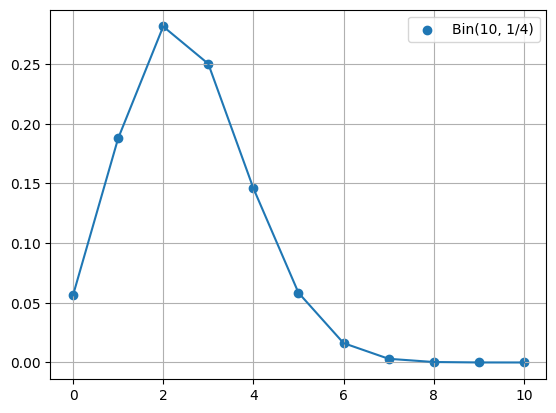

In [8]:
n = 10
p = 1/4
x_points = [i for i in range(n+1)]
binomial = [binomial_pmf(p=p,k=i,n=10) for i in range(n+1)]

plt.scatter(x_points, binomial,label='Bin(10, 1/4)')
plt.plot(x_points, binomial)
display_plot(plt)

In [9]:
def bionomial_cdf(p,n,k):
    return sum(binomial_pmf(p,n,i) for i in range(k+1))

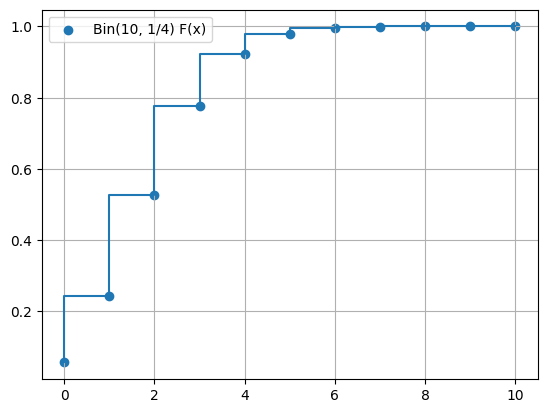

In [10]:
n = 10
p = 1/4
x_points = [i for i in range(n+1)]
binomial_cum = [bionomial_cdf(p=p,k=i,n=10) for i in range(n+1)]

plt.scatter(x_points, binomial_cum,label='Bin(10, 1/4) F(x)')
plt.step(x_points, binomial_cum)
display_plot(plt)

### The Geometric Distribution

The **geometric distribution** is a discrete probability distribution that describes the number of independent Bernoulli trials required to obtain the **first success**.

It is particularly useful in modeling situations where an experiment is repeated under identical conditions until a success occurs, with each trial having a constant probability of success.


In [11]:
def geometric_pmf(p,k):
    result = math.pow(1-p,k-1) * p
    return result

In [21]:
print(f'geometric_pmf(0.5,1) = {geometric_pmf(0.5,1)}')
print(f'geometric_pmf(0.5,2) = {geometric_pmf(0.5,2)}')
print(f'geometric_pmf(0.5,3) = {geometric_pmf(0.5,3)}')
print('geometric_pmf(0.2,10): ', geom.pmf(k=10,p=0.2))
assert geom.pmf(k=10,p=0.2) == geometric_pmf(p=0.2,k=10)

geometric_pmf(0.5,1) = 0.5
geometric_pmf(0.5,2) = 0.25
geometric_pmf(0.5,3) = 0.125
geometric_pmf(0.2,10):  0.026843545600000015


[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125]


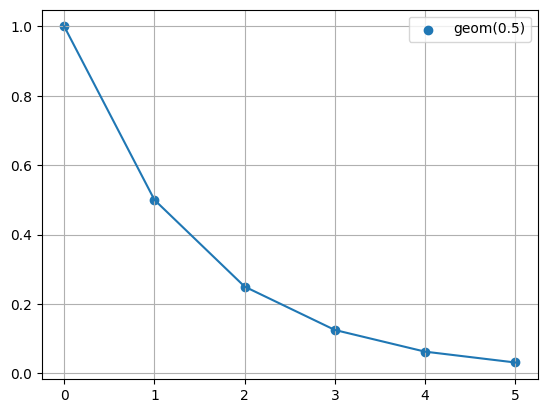

In [26]:
n = 5
p = 0.5
x_points = [i for i in range(n+1)]
geometric = [geometric_pmf(p=p,k=i) for i in range(n+1)]

plt.scatter(x_points, geometric,label='geom(0.5)')
plt.plot(x_points, geometric)
print(geometric)
display_plot(plt)

In [14]:
def geometric_cdf(p,k):
    return sum([geometric_pmf(p=p,k=i) for i in range(k)])

### Properties of the Geometric Distribution

Let $ X \sim \text{Geo}(p) $ (X has a Geo(p) distribution), where $ p $ is the probability of success on each trial.

- The probability that the first success occurs **after** $ k $ trials (i.e., all of the first $ k $ trials are failures) is:

$$
P(X > k) = (1 - p)^k, \quad \text{for } k \geq 0
$$

- Using the complement rule, the probability that the first success occurs **on or before** the $ k $-th trial is:

$$
P(X \leq k) = 1 - P(X > k) = 1 - (1 - p)^k
$$

This represents the probability that success occurs within the first $k$ trials.

In [15]:
def geometric_cdf(p,k):
    return  1- math.pow(1-p, k)

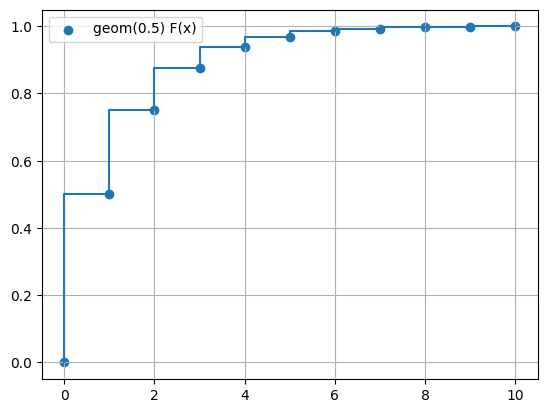

In [29]:
n = 10
p = 0.5
x_points = [i for i in range(n+1)]
geometric_cum = [geometric_cdf(p=p,k=i) for i in range(n+1)]

plt.scatter(x_points, geometric_cum,label='geom(0.5) F(x)')
plt.step(x_points, geometric_cum)
display_plot(plt)

### Memoryless Property of the Geometric Distribution

The geometric distribution possesses the **memoryless property**, which states that:

$$
P(X > n + k \mid X > k) = P(X > n)
$$

This means that the probability of needing more than $ n + k $ trials given that the first $ k $ trials were failures
is the same as the probability of needing more than $ n $ trials from the start.

**Proof:**

$$
P(X > n + k \mid X > k) = \frac{P(X > n + k \cap X > k)}{P(X > k)} = \frac{(1 - p)^{n + k}}{(1 - p)^k} = (1 - p)^n = P(X > n)
$$

This confirms the memoryless nature of the geometric distribution.


This implies that even after observing $ n $ consecutive failures, the probability of success on the next trial remains $ p $.

This **memoryless property** is a unique characteristic of the **geometric** and **exponential** distributions.
